In [1]:
%run algorithm.ipynb

import matplotlib.pyplot as plt
from datetime import timedelta
import time
import itertools
import networkx as nx

In [2]:
def coloring(G):
    node_colors = []
    for node in G.nodes():
        if G.degree[node] == 1:
            node_colors.append('red')
        else:
            node_colors.append('blue')
    return node_colors

In [5]:
def test_graph(num_of_nodes,
               edge_existence_prob = 0.3,
               num_iters=30,
               elitism_size=2,
               mutation_prob=0.1,
               population_size=15,
               tournament_size=3):

    G = nx.erdos_renyi_graph(num_of_nodes, edge_existence_prob)
    while not nx.is_connected(G):
        G = nx.erdos_renyi_graph(num_of_nodes, edge_existence_prob)

    print(f"\n\nTesting a graph of {num_of_nodes} nodes and {len(G.edges)} edges...\n")
    mst=nx.minimum_spanning_tree(G)
    print(sum(1 for node in mst if mst.degree[node] == 1))
    start_time = time.time()
    best_solution = ga(G, num_iters, elitism_size, mutation_prob, population_size, tournament_size)
    end_time = time.time()

    print("Number of leaves:", best_solution.fitness)
    print(f"Execution time: {timedelta(seconds=end_time-start_time)}")
    
    
    MLST = nx.Graph()
    MLST.add_edges_from(best_solution.edges)
    
    node_colors = []
    for node in MLST.nodes():
        if MLST.degree[node] == 1:
            node_colors.append('red')
        else:
            node_colors.append('blue')
    
    _, axes = plt.subplots(1, 2, figsize=(10, 5))

    nx.draw(G, node_size=10000/num_of_nodes, ax=axes[0])
    axes[0].set_title("Original graph")

    nx.draw(MLST, node_color=node_colors, node_size=10000/num_of_nodes, ax=axes[1])
    axes[1].set_title("Maximum Leaf Spanning Tree")

    plt.tight_layout()
    plt.show()




Testing a graph of 10 nodes and 13 edges...

6
Number of leaves: 7
Execution time: 0:00:00.083554


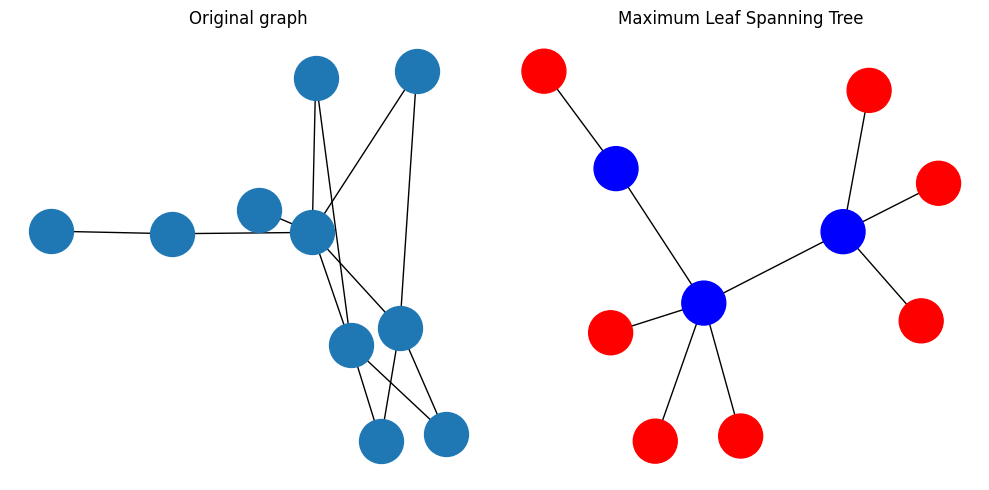

In [8]:
test_graph(num_of_nodes=10,
               edge_existence_prob = 0.3,
               num_iters=10,
               elitism_size=2,
               mutation_prob=0.1,
               population_size=30,
               tournament_size=3)



Testing a graph of 50 nodes and 210 edges...

31
Number of leaves: 40
Execution time: 0:00:02.474874


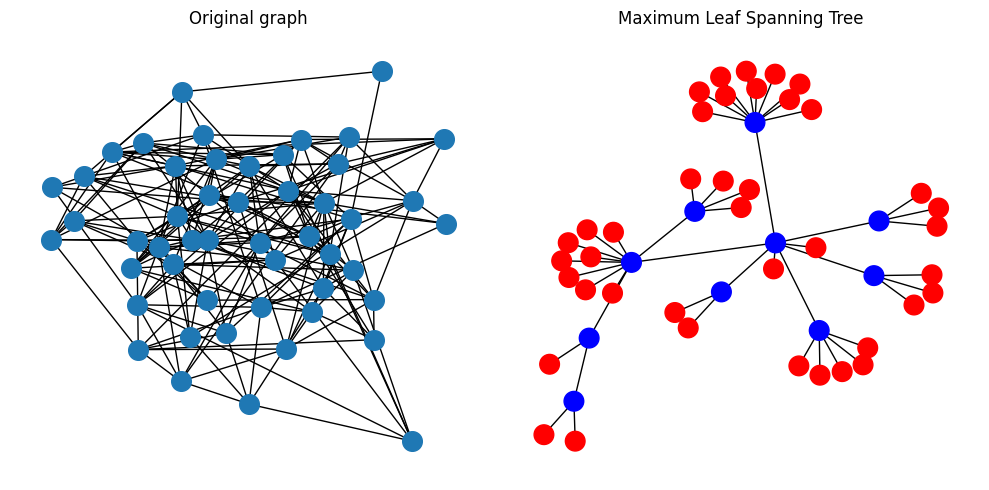

In [11]:
test_graph(num_of_nodes=50,
               edge_existence_prob = 0.2,
               num_iters=100,
               elitism_size=5,
               mutation_prob=0.5,
               population_size=20,
               tournament_size=5)



Testing a graph of 100 nodes and 1425 edges...

86
Number of leaves: 89
Execution time: 0:00:04.325266


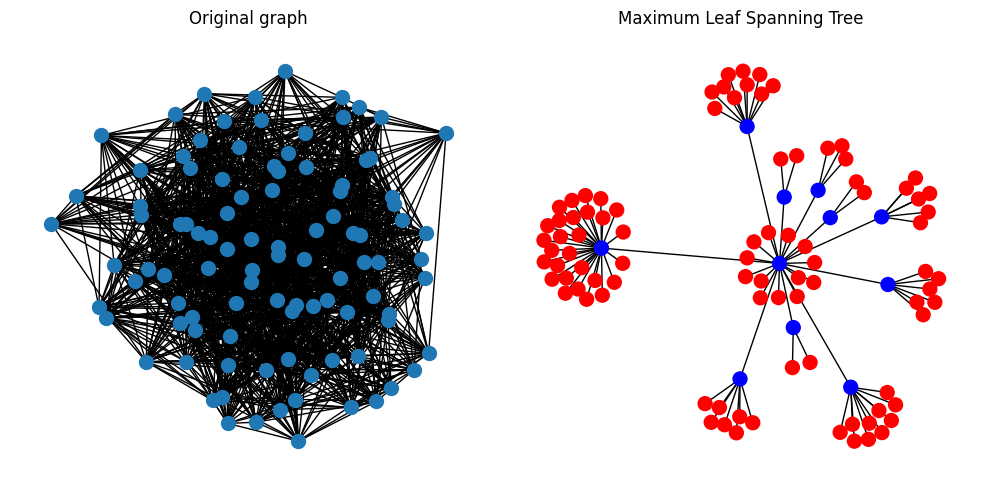

In [208]:
test_graph(num_of_nodes=100,
               edge_existence_prob = 0.3,
               num_iters=50,
               elitism_size=2,
               mutation_prob=0.5,
               population_size=20,
               tournament_size=10)

In [11]:
num_of_nodes = [10]
edge_existence_probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
num_iters = [10, 15, 20]
elitism_sizes = [2, 5]
mutation_probs = [0.1, 0.2]
population_sizes = [20, 30]
tournament_sizes = [5, 10]


parameter_grid = list(itertools.product(num_of_nodes, edge_existence_probs, num_iters,
                                        elitism_sizes, mutation_probs, population_sizes, tournament_sizes))


results = []

In [4]:
for params in parameter_grid:
    nodes, prob, iters, elitism, mutation_prob, pop_size, tour_size = params
    graph = nx.erdos_renyi_graph(nodes, prob)
    
    # Ensure graph is connected
    while not nx.is_connected(graph):
        graph = nx.erdos_renyi_graph(nodes, prob)
    
    # Run GA
    start_time = time.time()
    best_solution = ga(graph, iters, elitism, mutation_prob, pop_size, tour_size)
    end_time = time.time()
    
    # Store results
    execution_time = timedelta(seconds=end_time - start_time)
    results.append({
        "params": params,
        "execution_time": execution_time,
        "fitness": best_solution.fitness
    })

In [5]:
sorted_results = sorted(results, key=lambda x: x["fitness"], reverse=True)
for result in sorted_results:
    print(result)

{'params': (10, 0.7, 15, 2, 0.2, 20, 10), 'execution_time': datetime.timedelta(microseconds=31254), 'fitness': 9}
{'params': (10, 0.7, 15, 5, 0.1, 30, 5), 'execution_time': datetime.timedelta(microseconds=46878), 'fitness': 9}
{'params': (10, 0.7, 15, 5, 0.2, 20, 5), 'execution_time': datetime.timedelta(microseconds=31254), 'fitness': 9}
{'params': (10, 0.3, 15, 5, 0.2, 20, 5), 'execution_time': datetime.timedelta(microseconds=31252), 'fitness': 8}
{'params': (10, 0.5, 10, 2, 0.1, 30, 5), 'execution_time': datetime.timedelta(microseconds=62505), 'fitness': 8}
{'params': (10, 0.5, 10, 5, 0.1, 20, 5), 'execution_time': datetime.timedelta(microseconds=31251), 'fitness': 8}
{'params': (10, 0.5, 15, 5, 0.1, 20, 5), 'execution_time': datetime.timedelta(microseconds=109387), 'fitness': 8}
{'params': (10, 0.5, 20, 2, 0.2, 30, 10), 'execution_time': datetime.timedelta(microseconds=140635), 'fitness': 8}
{'params': (10, 0.6, 10, 2, 0.1, 30, 10), 'execution_time': datetime.timedelta(microseconds=